In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from selenium import webdriver
import time
import os

In [2]:
file_paths = ['divvy_trips.csv', 'citi_trips.csv', 'metro_trips.csv']
trips = [pd.read_csv(file) for file in file_paths]

/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/1802991526.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = [pd.read_csv(file) for file in file_paths]


In [3]:
for trip in trips:
    print(trip.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification', 'associated_trip_id'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification'],
      dtype='object')


In [9]:
pd.unique(trips[0].classification)

array(['none', 'MS', 'MI-FM', 'MI-LM', 'MI-FLM'], dtype=object)

Plot for Chicago (Divvy + CTA) completed.
Plot for New York City (Citi Bike + MTA) completed.
Plot for Los Angeles (Metro Bikeshare + Metro) completed.


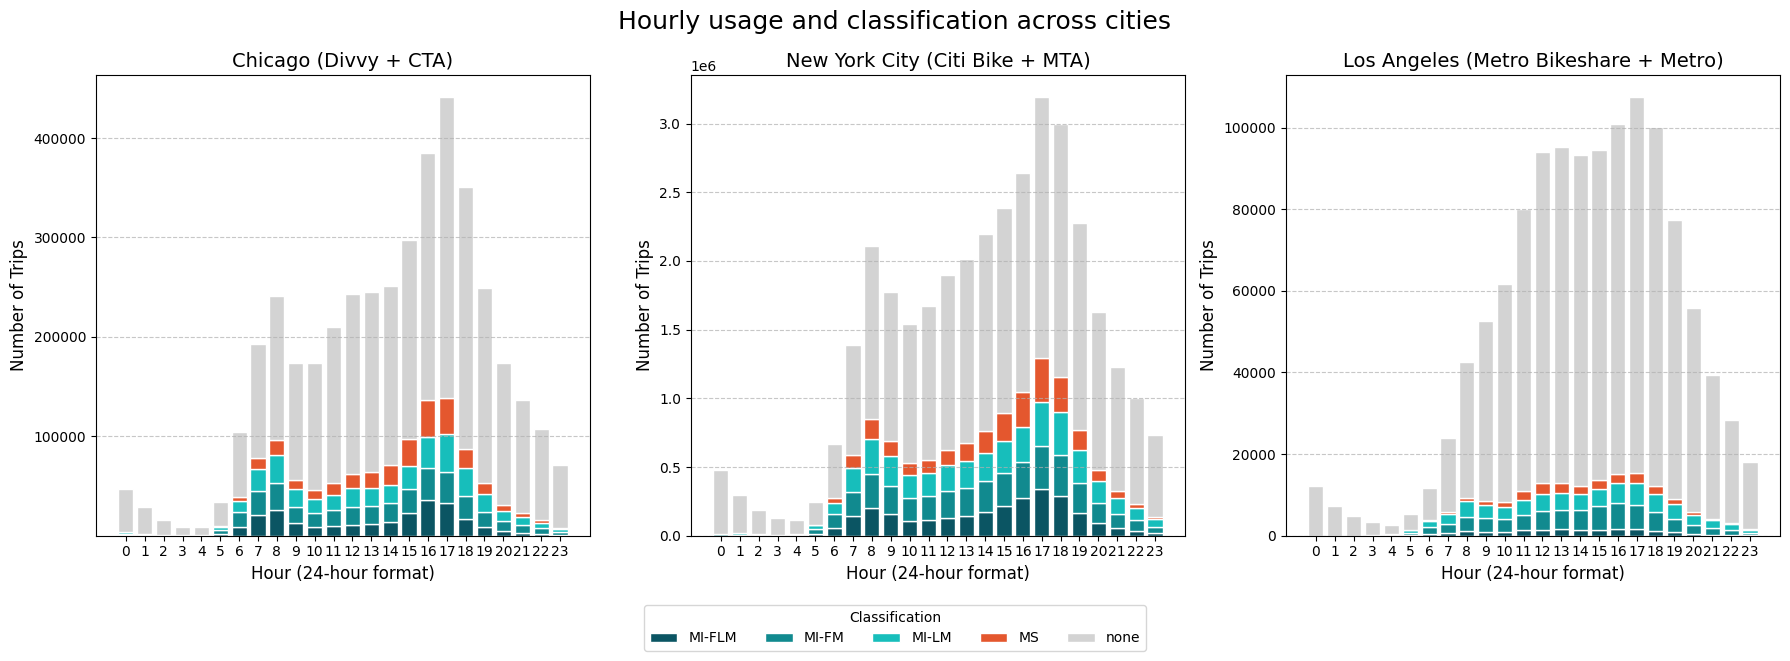

In [37]:
titles = ['Chicago (Divvy + CTA)', 'New York City (Citi Bike + MTA)', 'Los Angeles (Metro Bikeshare + Metro)']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
colors = {'MI-FLM': '#0B5563', 'MI-FM': '#118A8F', 'MI-LM': '#17BEBB', 'MS': '#E4572E', 'none': 'lightgrey'} 
# colors = {'MI-FLM': '#BBBDF6', 'MI-FM': '#645E9D', 'MI-LM': '#392B58', 'MS': '#78A300', 'none': 'lightgrey'}

fig.suptitle('Hourly usage and classification across cities', fontsize=18)

for i, (ax, file_path, title) in enumerate(zip(axes, file_paths, titles)):
    df = trips[i]

    df['hour'] = pd.to_datetime(df['started_at'], errors='coerce').dt.hour
    if df['hour'].isna().any():
        df = df.dropna(subset=['hour'])

    grouped = df.groupby(['hour', 'classification']).size().unstack(fill_value=0)

    hours = grouped.index
    classifications = grouped.columns

    bottom = pd.Series(0, index=hours)

    for classification in classifications:
        ax.bar(
            hours,
            grouped[classification],
            bottom=bottom,
            label=f'{classification}',
            color=colors.get(classification, 'black'),
            edgecolor='white'
        )
        bottom += grouped[classification]

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour (24-hour format)', fontsize=12)
    ax.set_xticks(range(0, 24))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylabel('Number of Trips', fontsize=12)

    print(f'Plot for {title} completed.')

handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(colors),
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Plot for Chicago (Divvy + CTA) completed.
Plot for New York City (Citi Bike + MTA) completed.
Plot for Los Angeles (Metro Bikeshare + Metro) completed.


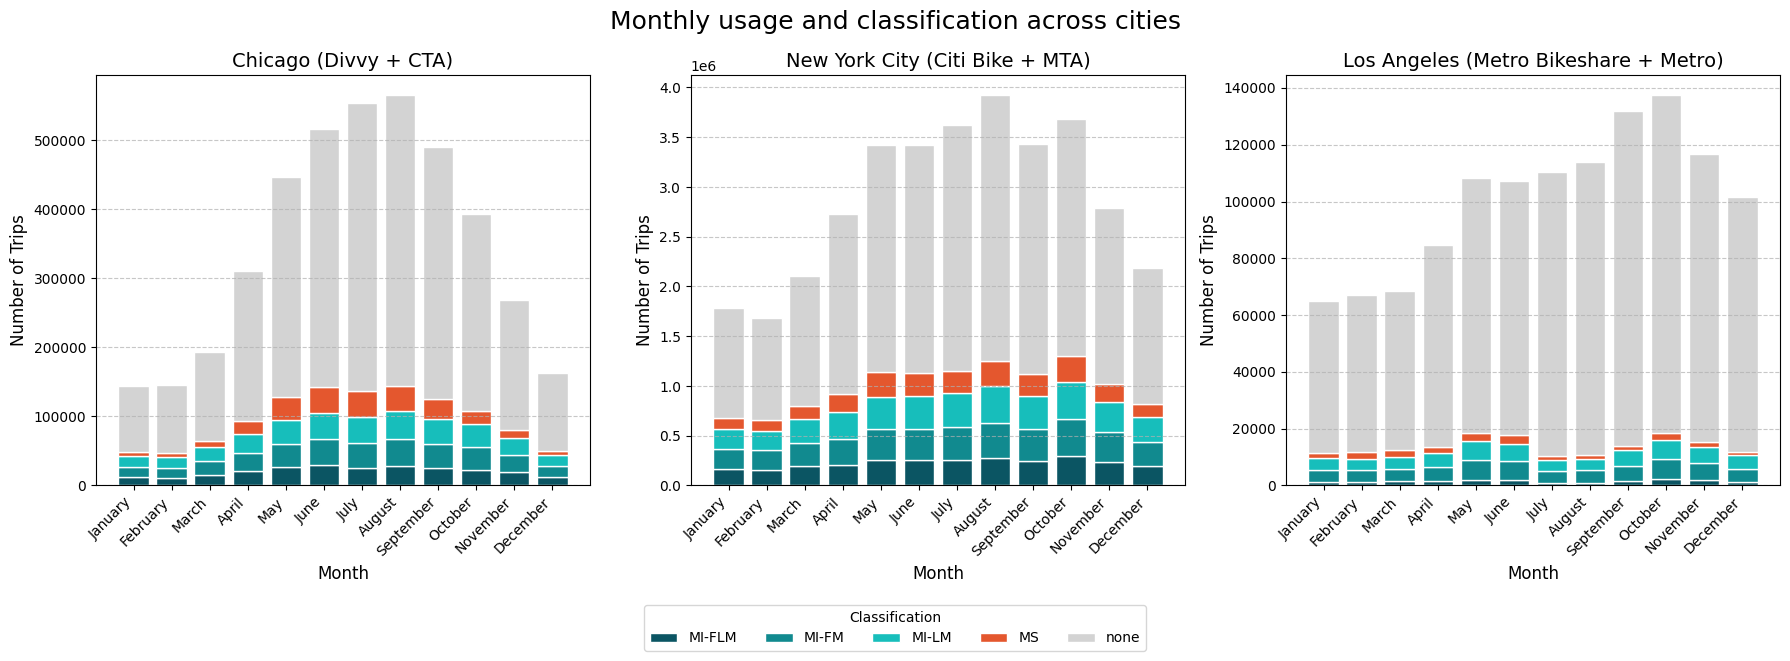

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

titles = ['Chicago (Divvy + CTA)', 'New York City (Citi Bike + MTA)', 'Los Angeles (Metro Bikeshare + Metro)']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
colors = {'MI-FLM': '#0B5563', 'MI-FM': '#118A8F', 'MI-LM': '#17BEBB', 'MS': '#E4572E', 'none': 'lightgrey'}

fig.suptitle('Monthly usage and classification across cities', fontsize=18)

for i, (ax, file_path, title) in enumerate(zip(axes, file_paths, titles)):
    df = trips[i]

    df['month'] = pd.to_datetime(df['started_at'], errors='coerce').dt.month
    if df['month'].isna().any():
        df = df.dropna(subset=['month'])

    grouped = df.groupby(['month', 'classification']).size().unstack(fill_value=0)

    grouped.index = pd.to_datetime(grouped.index, format='%m').month_name()

    grouped = grouped.loc[['January', 'February', 'March', 'April', 'May', 'June',
                           'July', 'August', 'September', 'October', 'November', 'December']]

    months = grouped.index
    classifications = grouped.columns

    bottom = pd.Series(0, index=months)

    for classification in classifications:
        ax.bar(
            months,
            grouped[classification],
            bottom=bottom,
            label=f'{classification}',
            color=colors.get(classification, 'black'),
            edgecolor='white'
        )
        bottom += grouped[classification]

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_xticks(range(12))
    ax.set_xticklabels(months, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylabel('Number of Trips', fontsize=12)

    print(f'Plot for {title} completed.')

handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(colors),
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

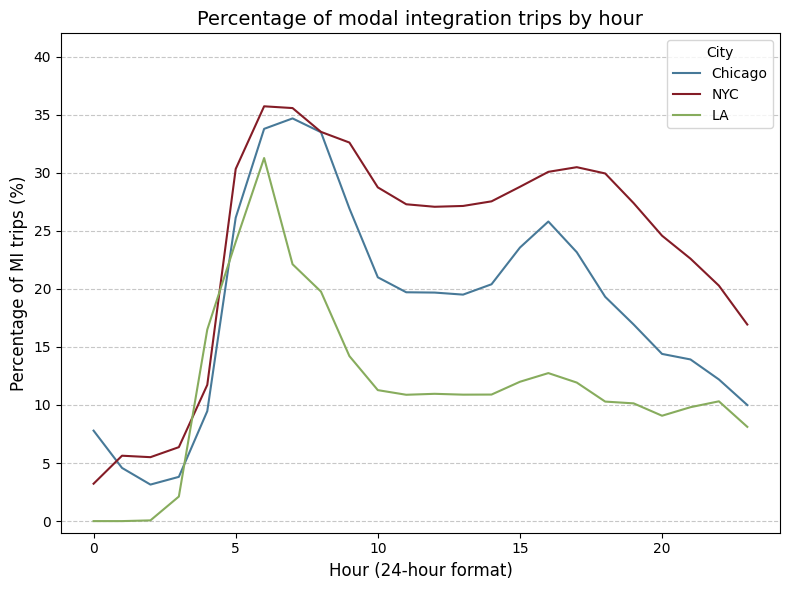

In [45]:
all_data = pd.DataFrame()
titles = ['Chicago', 'NYC', 'LA']
colors = {'Chicago': '#477998', 'NYC': '#841C26', 'LA': '#87AC5D'}

for i, (file_path, title) in enumerate(zip(file_paths, titles)):
    df = trips[i]

    df['hour'] = pd.to_datetime(df['started_at'], errors='coerce').dt.hour
    if df['hour'].isna().any():
        df = df.dropna(subset=['hour'])

    mi_classifications = ['MI-FM', 'MI-LM', 'MI-FLM']
    mi_df = df[df['classification'].isin(mi_classifications)]

    total_trips_per_hour = df.groupby('hour').size()
    mi_trips_per_hour = mi_df.groupby(['hour']).size()

    percentages = (mi_trips_per_hour / total_trips_per_hour) * 100
    percentages = percentages.fillna(0)

    percentages = percentages.reset_index(name='percentage')
    percentages['city'] = title

    all_data = pd.concat([all_data, percentages], ignore_index=True)

plt.figure(figsize=(8,6))

for city in titles:
    city_data = all_data[all_data['city'] == city]
    plt.plot(
        city_data['hour'],
        city_data['percentage'],
        label=f'{city}',
        color=colors[city]
    )

plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Percentage of MI trips (%)', fontsize=12)
plt.title('Percentage of modal integration trips by hour', fontsize=14)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(-1, 42)

plt.tight_layout()
plt.show()


In [64]:
for i, city in enumerate(['Chicago', 'NYC', 'LA']):
    df = trips[i]
    df = df.dropna(subset=['start_lat', 'start_lng'])

    for classification in ['MI', 'MS', 'none']:
        class_data = df[df['classification'].isin((classification,) if classification != 'MI' else ('MI-FLM', 'MI-FM', 'MI-LM'))]
        
        class_data['coords'] = list(zip(class_data['start_lat'], class_data['start_lng']))
        coord_counts = class_data['coords'].value_counts().reset_index()
        coord_counts.columns = ['coords', 'count']
        
        coord_counts['normalized_count'] = np.log1p(coord_counts['count'])
        
        heat_data = [[coord[0], coord[1], intensity] for coord, intensity in zip(coord_counts['coords'], coord_counts['normalized_count'])]
        
        map_center = [df['start_lat'].mean(), df['start_lng'].mean()]
        m = folium.Map(location=map_center, zoom_start=12)
        
        HeatMap(
            data=heat_data, 
            max_val=coord_counts['normalized_count'].max(),
            radius=10,
            blur=8,
        ).add_to(m)
        
        m.save(f'{city.lower()}_{classification.lower()}_start_heatmap.html')

    print(f'done with {city}')


/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['coords'] = list(zip(class_data['start_lat'], class_data['start_lng']))
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

done with Chicago


/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['coords'] = list(zip(class_data['start_lat'], class_data['start_lng']))
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

done with NYC


/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['coords'] = list(zip(class_data['start_lat'], class_data['start_lng']))
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

done with LA


/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['coords'] = list(zip(class_data['start_lat'], class_data['start_lng']))
/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/869334342.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [82]:
city_names = ['Chicago', 'NYC', 'LA']
current_dir = os.getcwd()

for city, df in zip(city_names, trips):
    df = df.dropna(subset=['start_lat', 'start_lng'])
    
    mi_classifications = ['MI-FLM', 'MI-FM', 'MI-LM']
    
    total_trips = df.groupby('start_station_id').size()
    mi_trips = df[df['classification'].isin(mi_classifications)].groupby('start_station_id').size()
    percentages = (mi_trips / total_trips * 100).fillna(0).reset_index(name='mi_percentage')
    
    station_coords = df.groupby('start_station_id')[['start_lat', 'start_lng']].mean().reset_index()
    percentages = percentages.merge(station_coords, on='start_station_id', how='left').dropna()
    
    heat_data = percentages[['start_lat', 'start_lng', 'mi_percentage']].values.tolist()
    
    map_center = [df['start_lat'].mean(), df['start_lng'].mean()]
    m = folium.Map(location=map_center, zoom_start=11)
    
    HeatMap(
        data=heat_data, 
        radius=5,
        blur=3,
    ).add_to(m)

    map_path = os.path.join(current_dir, f'{city.lower()}_mi_percentage_heatmap.html')
    image_path = os.path.join(current_dir, f'{city.lower()}_mi_percentage_heatmap.png')
    
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    
    driver = webdriver.Chrome(options=options)
    driver.set_window_size(1200, 800)
    
    driver.get(f'file://{map_path}')
    time.sleep(2)
    
    driver.save_screenshot(image_path)
    driver.quit()

    print(f'done with {city}')

Processing city: Chicago
Saved heatmap for Chicago: /Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/chicago_mi_percentage_heatmap.html
/Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/chicago_mi_percentage_heatmap.png
Processing city: NYC
Saved heatmap for NYC: /Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/nyc_mi_percentage_heatmap.html
/Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/nyc_mi_percentage_heatmap.png
Processing city: LA
Saved heatmap for LA: /Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/la_mi_percentage_heatmap.html
/Users/pollyren/Desktop/stuff/cegu_thesis/bikeshare_transit_dynamics/3_modalAnalysis/la_mi_percentage_heatmap.png
